In [ ]:
!pip install matchms
!pip install rdkit
!pip install torch_geometric
!pip install pickle5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.6/109.6 kB 790.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.1/235.1 kB 10.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 36.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 661.6/661.6 kB 23.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for torch_geometric: filename=torch_geometric-2.3.1-py3-none-any.whl size=910476 sha256=232b9705f6c0876413bf484a9d9ee78095888487aa8bc96fb08e64ccbb1e2016
  Stored in directory: /root/.cache/pip/wheels/ac/dc/30/e2874821ff308ee67dc

In [ ]:
from matchms.importing import load_from_msp
import numpy as np
import os
import random
import pickle
import glob
import time
import re
from rdkit import Chem
from rdkit.Chem import Descriptors
import matchms
from matchms import Spectrum

import matplotlib.pyplot as plt
import warnings

from rdkit.Chem.rdmolops import GetAdjacencyMatrix

# Pytorch and Pytorch Geometric
import torch
from torch_geometric.data import Data
from torch.nn import Linear
import torch.nn.functional as F 
from torch_geometric.nn import GCNConv, TopKPooling, global_mean_pool, GATConv
from torch_geometric.nn import global_mean_pool as gap, global_max_pool as gmp
import torch.nn as nn
from torch_geometric.data import DataLoader

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp /content/drive/MyDrive/NIST_LIB/model_base_big.py model_base_big.py
!cp /content/drive/MyDrive/NIST_LIB/validation_metrics.py validation_metrics.py

In [ ]:
import model_base_big
import validation_metrics

In [ ]:
with open("/content/drive/MyDrive/NIST_SMALL/validation_subset_pow.pkl", 'rb') as handle:
    validation_dataset  = pickle.load(handle)

In [ ]:
REGEX = "*.pt"
PATH_MODELS = "/content/drive/MyDrive/NIST_SMALL/GAT_DEEP_BIG_POW"
BATCH = 64
MAX_INTENSITY = 999.

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
matchms.set_matchms_logger_level("ERROR")

In [ ]:
validation_loader_unshuffled = DataLoader(validation_dataset, 
                         batch_size=BATCH, shuffle=False)

heads = 4
MODEL_CLASS = model_base_big.GAT_DEEP_BIG(heads)
models_path = validation_metrics.load_each_model(PATH_MODELS, REGEX)

validation_metrics.load_models_and_predict(models_path, MODEL_CLASS, validation_loader_unshuffled)

In [ ]:
REGEX_VALIDATION = r'^validation\d+\.pkl$'
validation_paths = validation_metrics.find_validation_files(PATH_MODELS, REGEX_VALIDATION)
statistics_validation = validation_metrics.compute_statistics_for_validation(validation_paths)

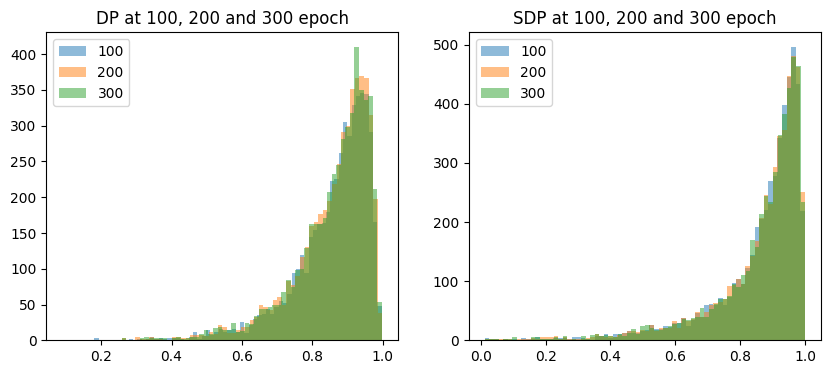

In [ ]:
validation_metrics.histograms_convolved(PATH_MODELS, statistics_validation)

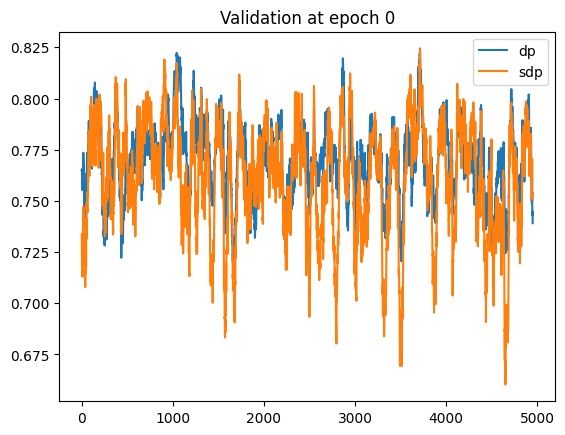

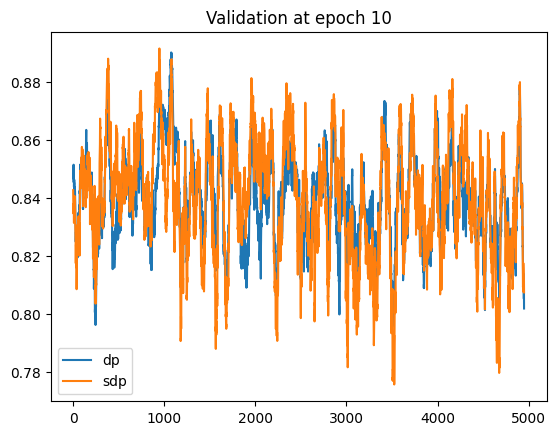

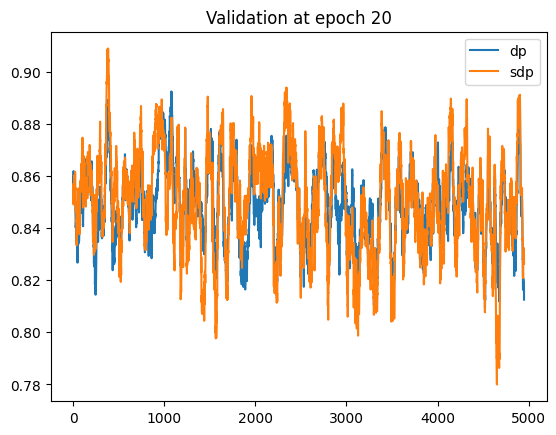

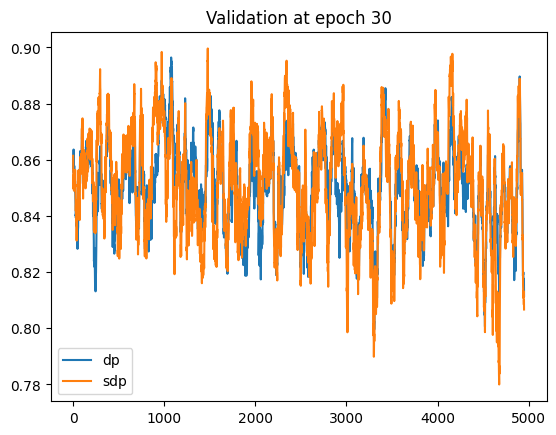

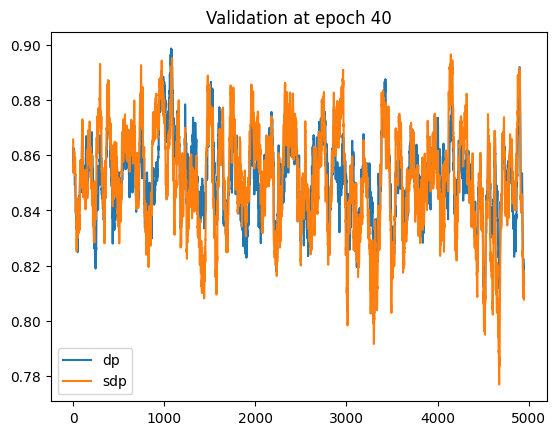

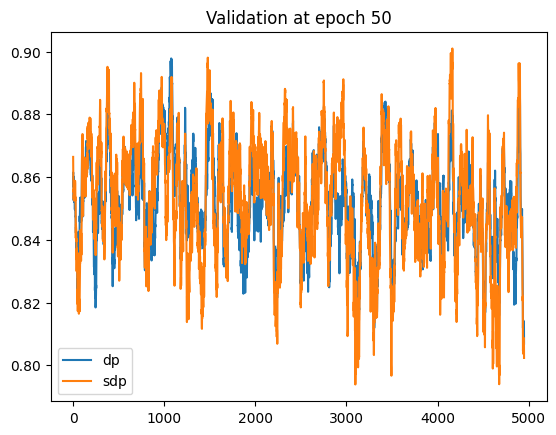

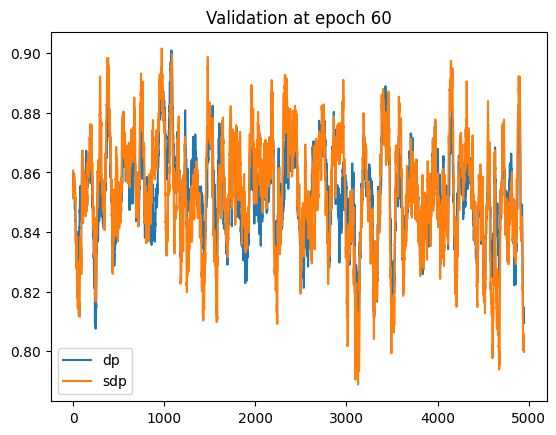

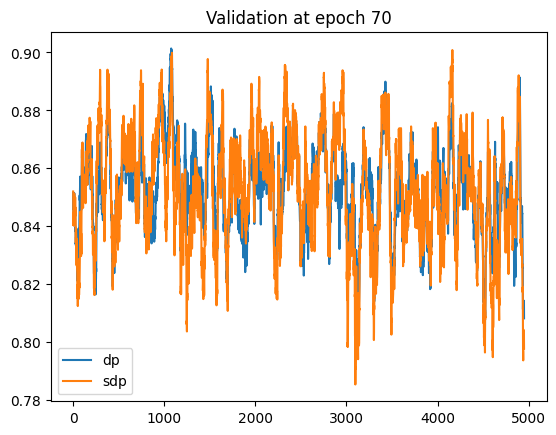

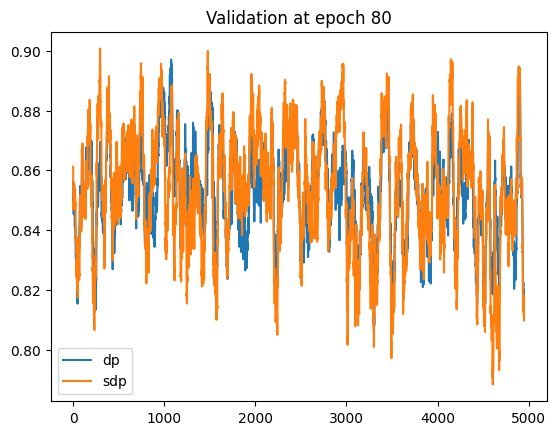

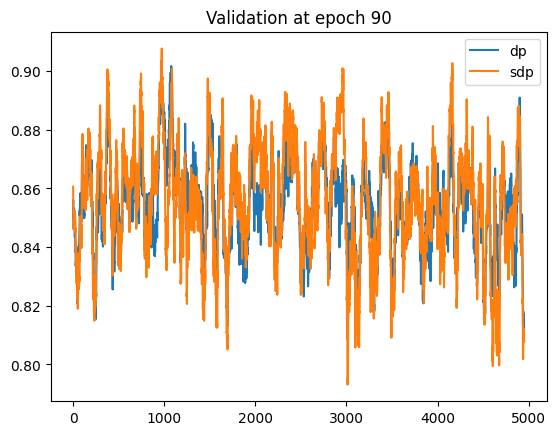

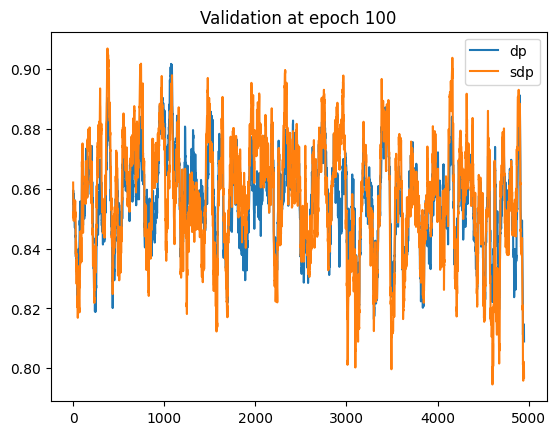

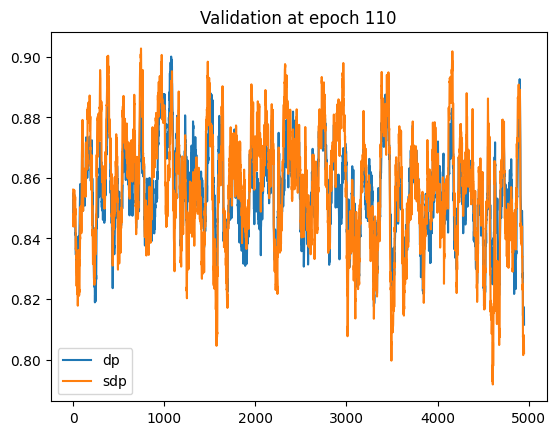

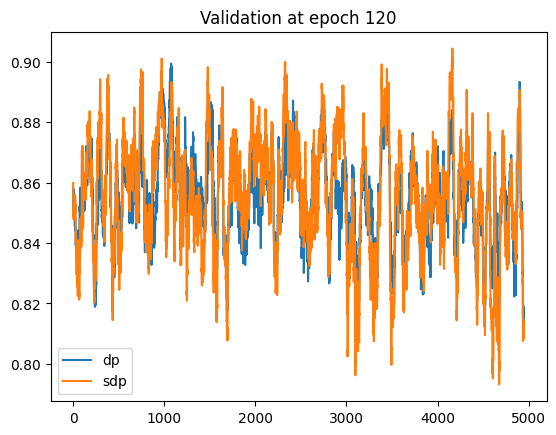

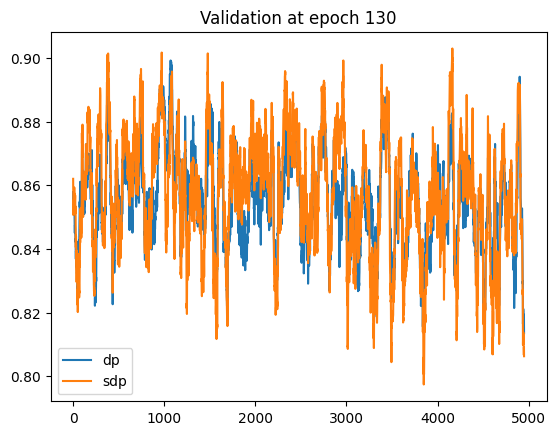

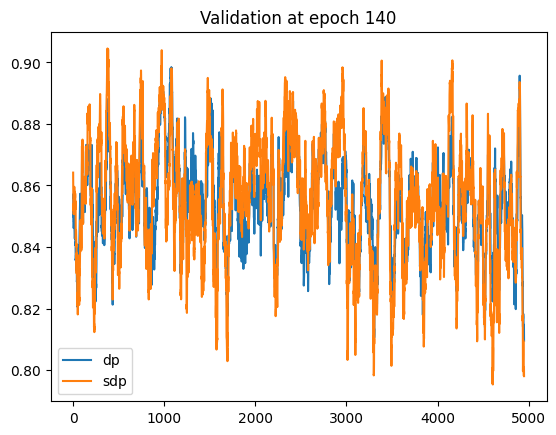

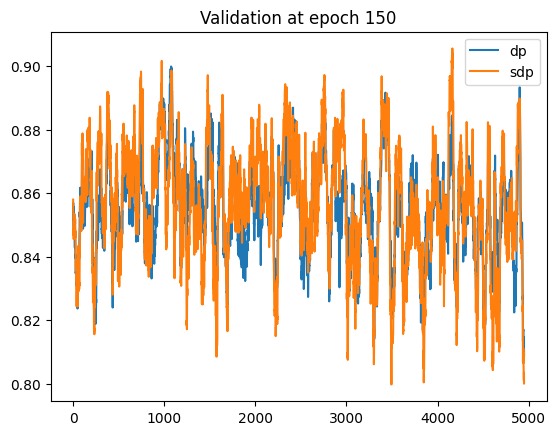

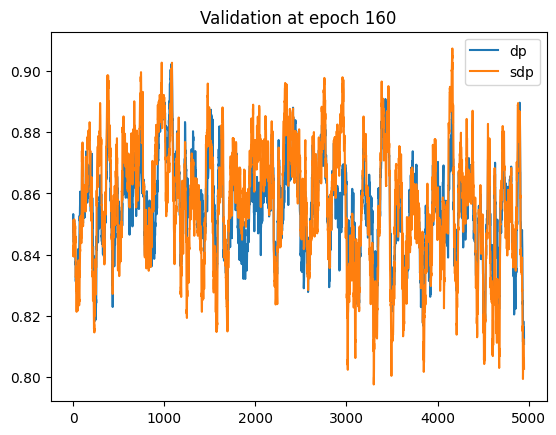

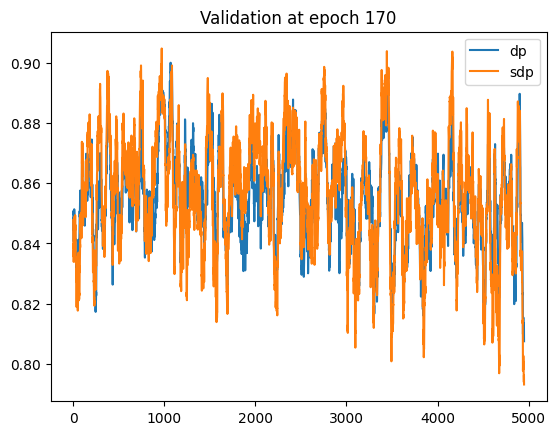

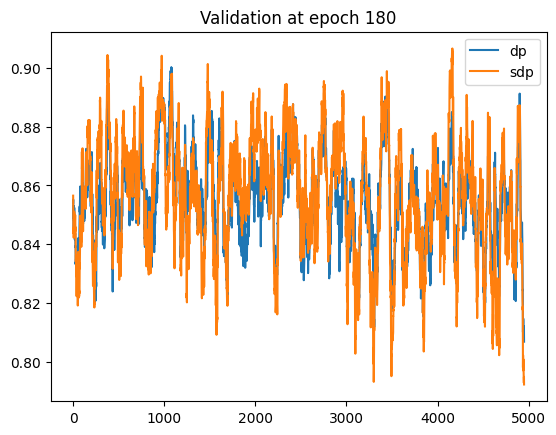

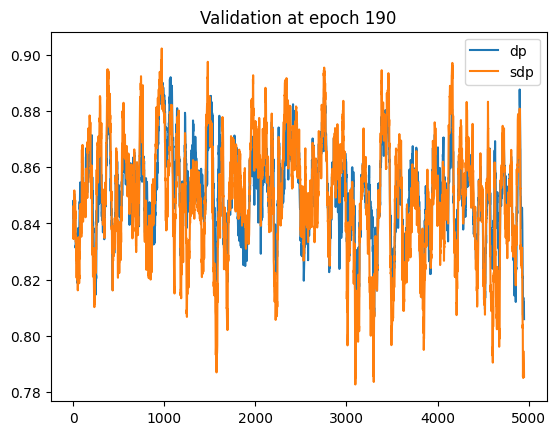

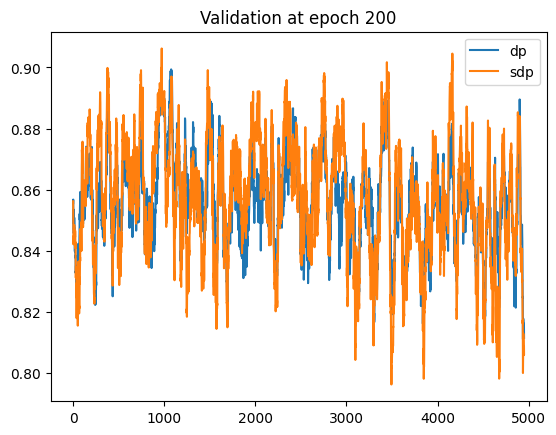

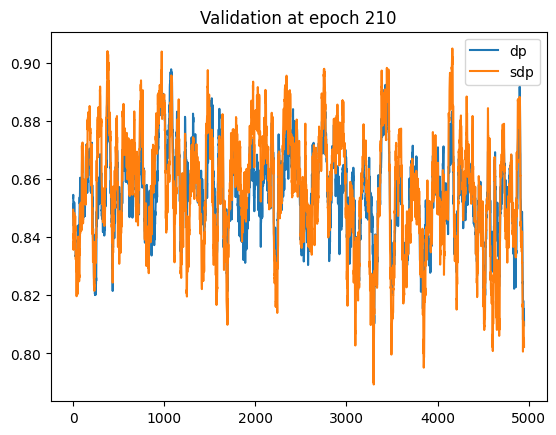

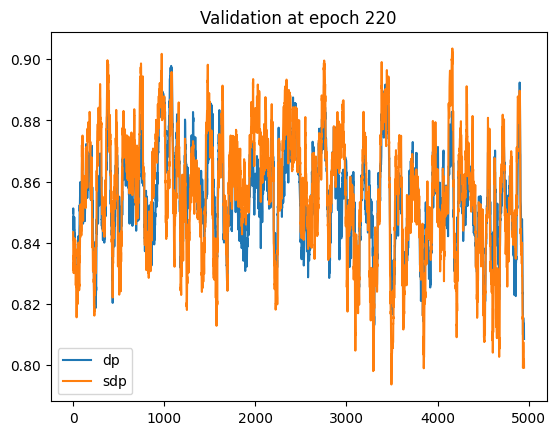

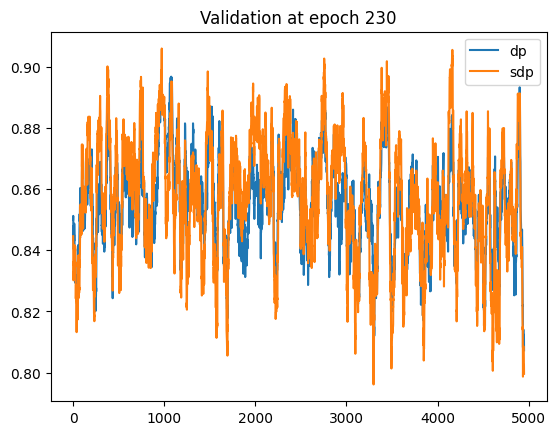

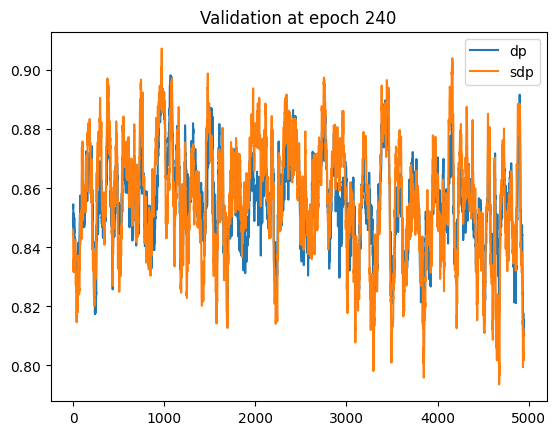

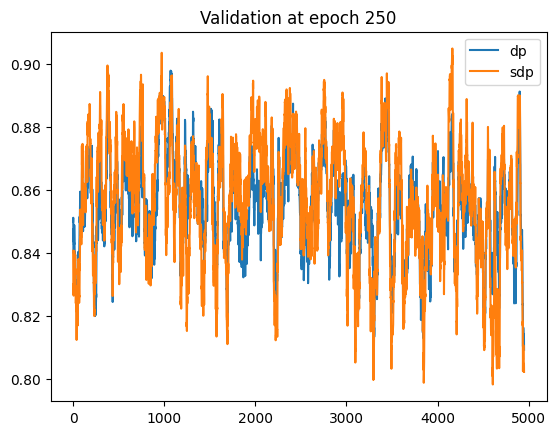

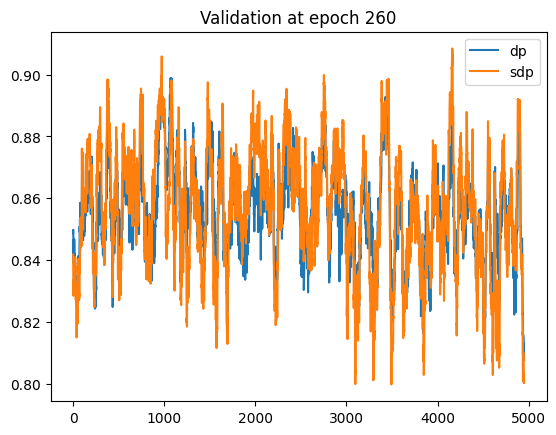

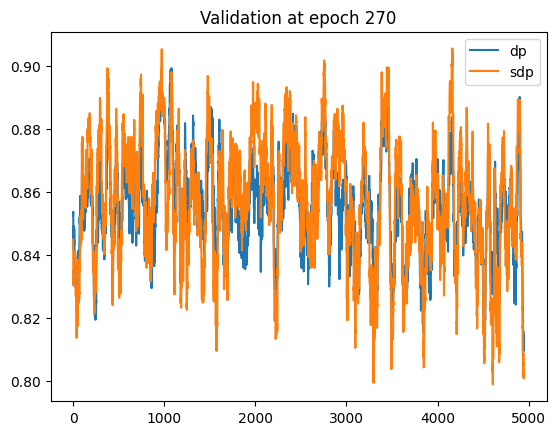

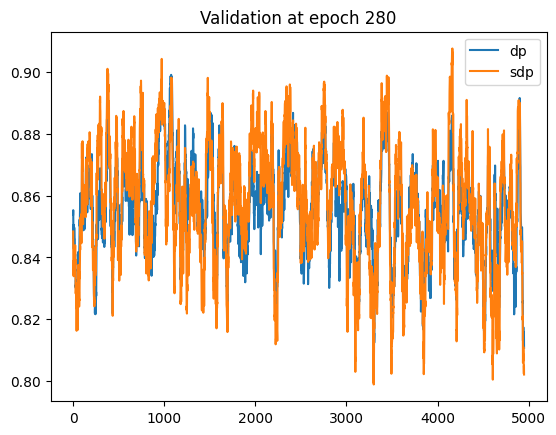

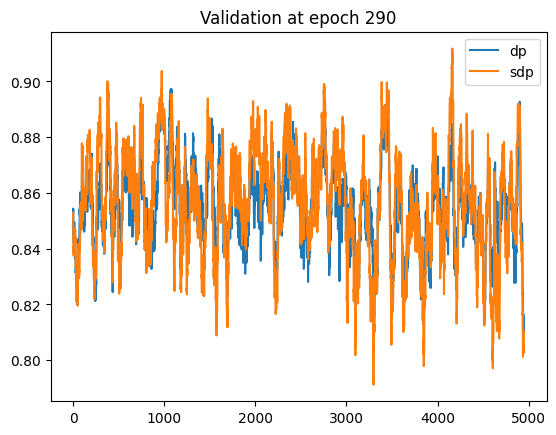

In [ ]:
validation_metrics.plot_convolve_mean(statistics_validation)

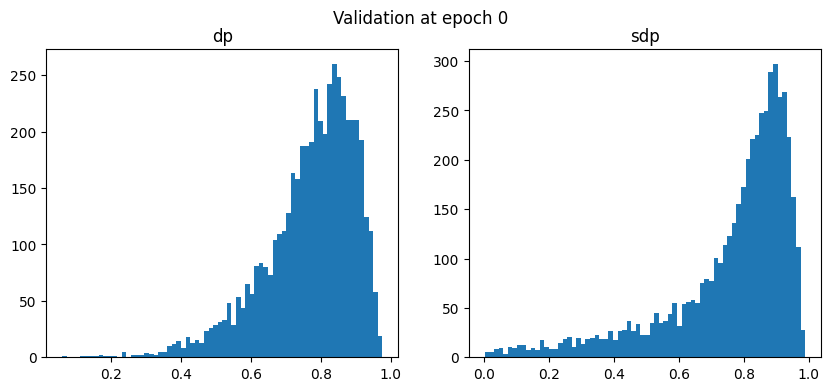

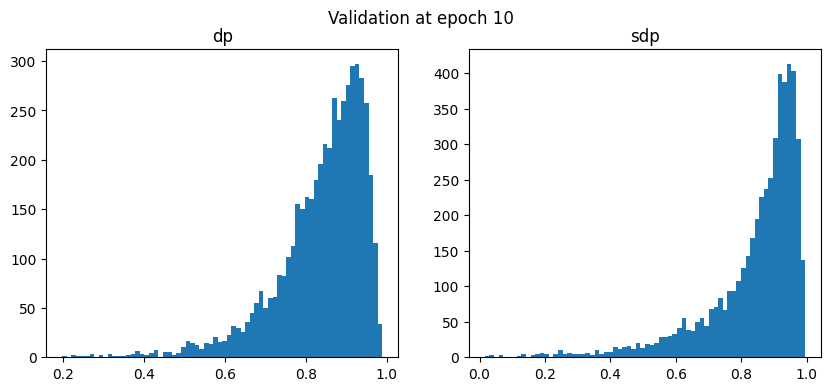

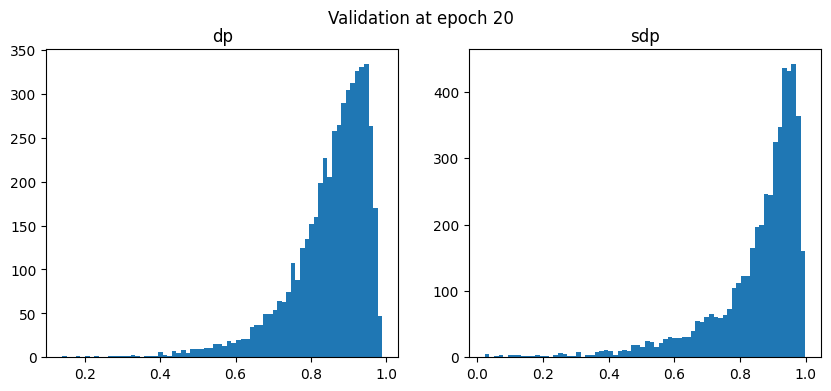

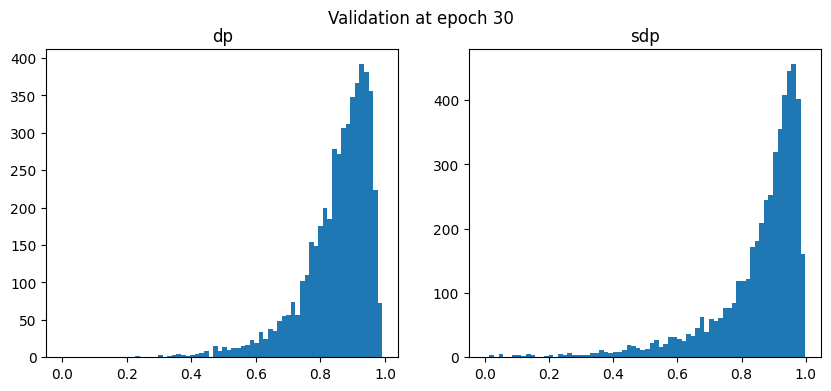

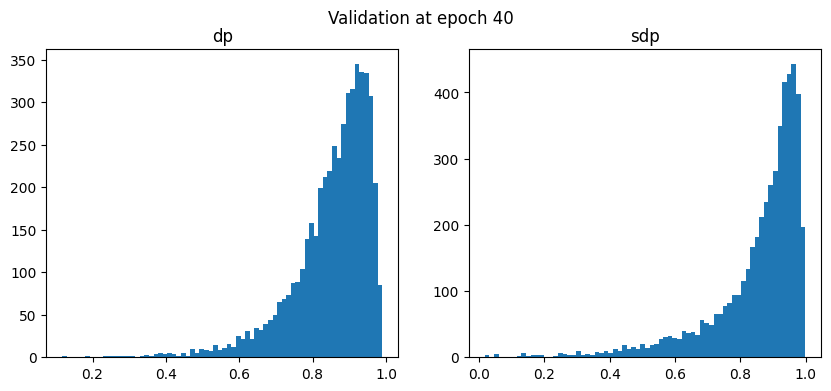

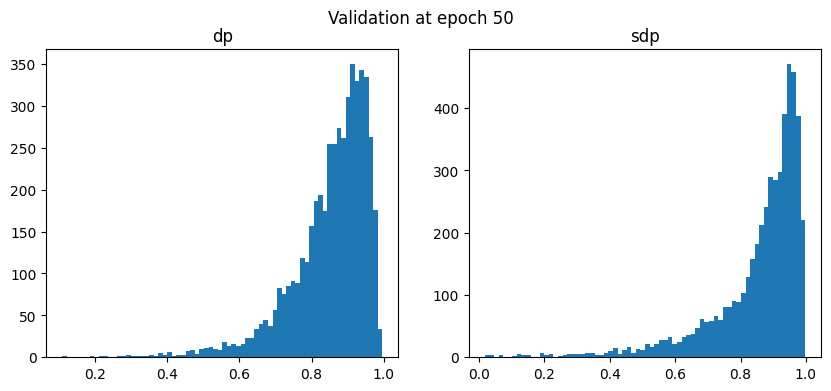

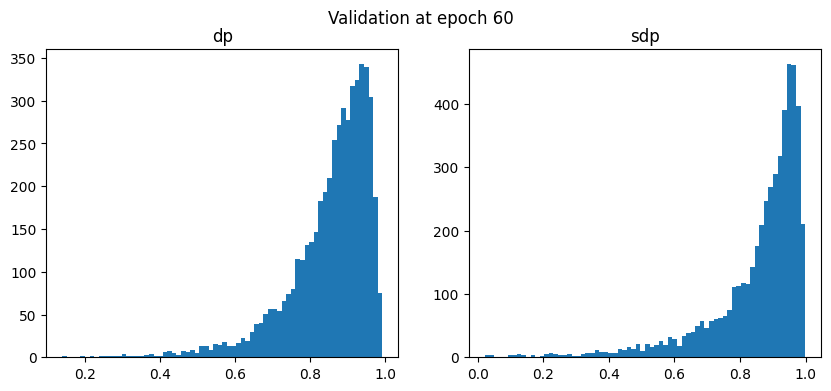

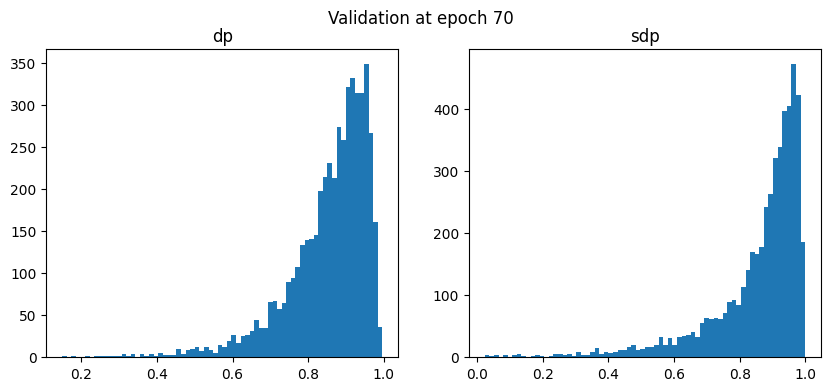

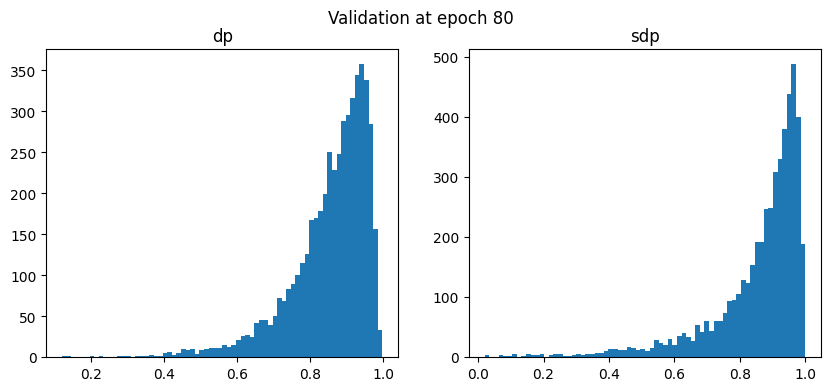

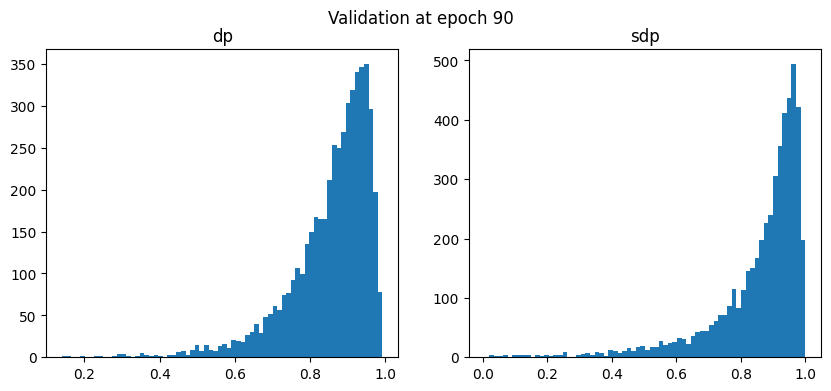

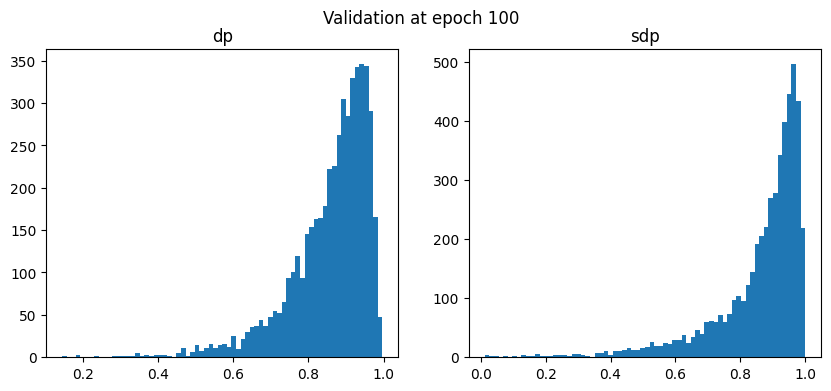

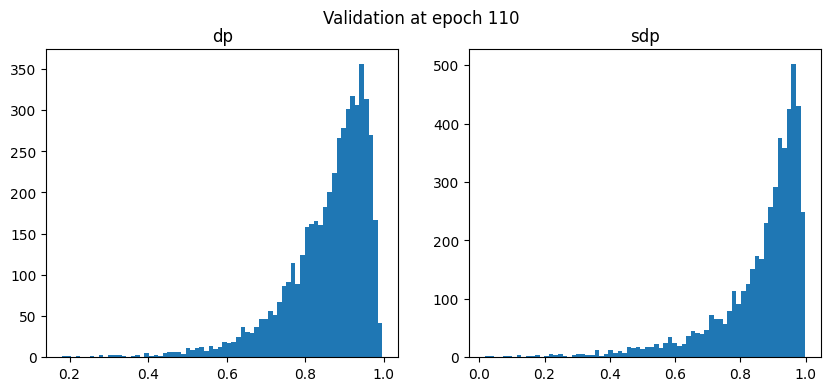

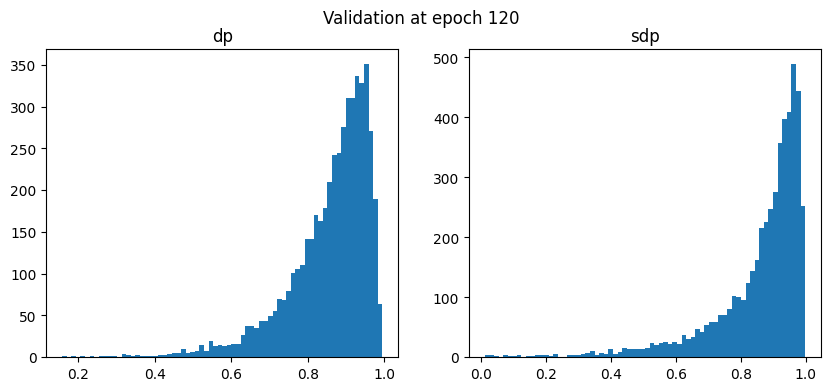

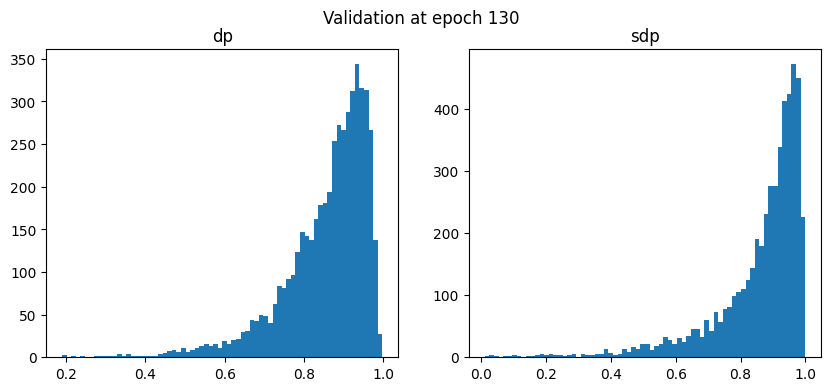

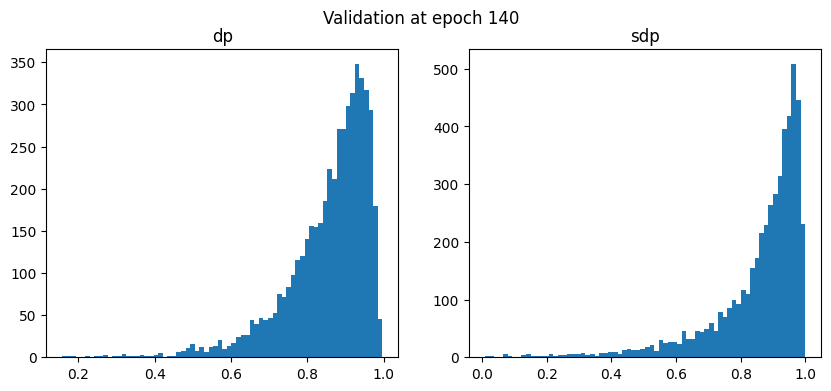

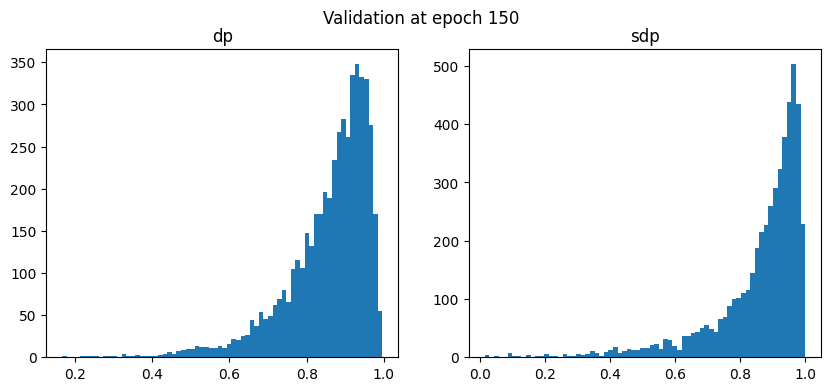

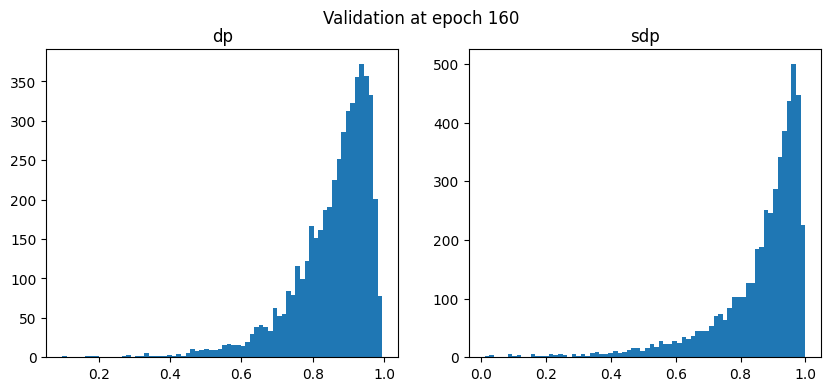

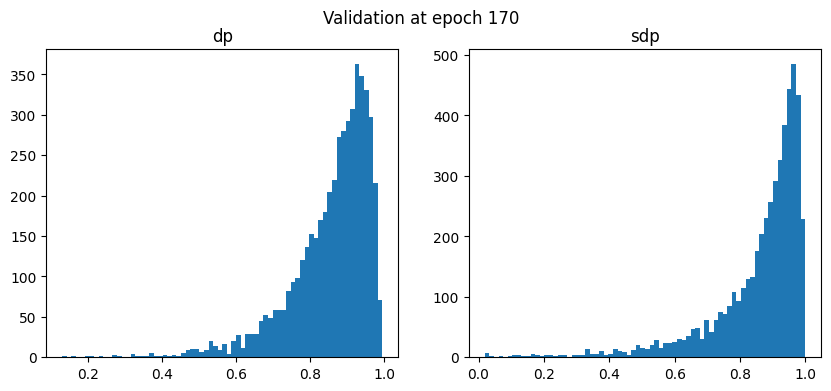

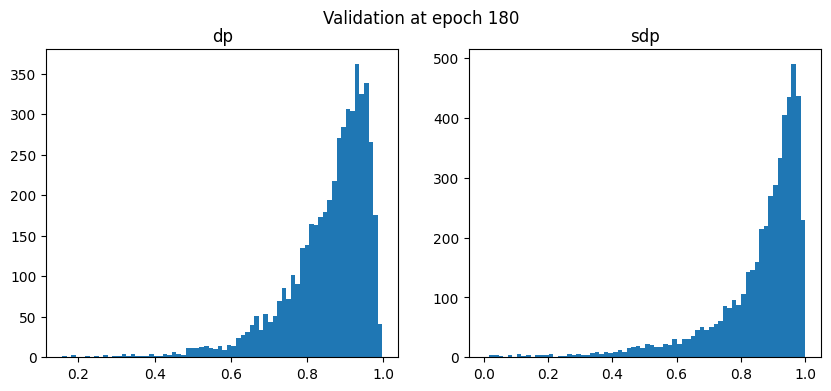

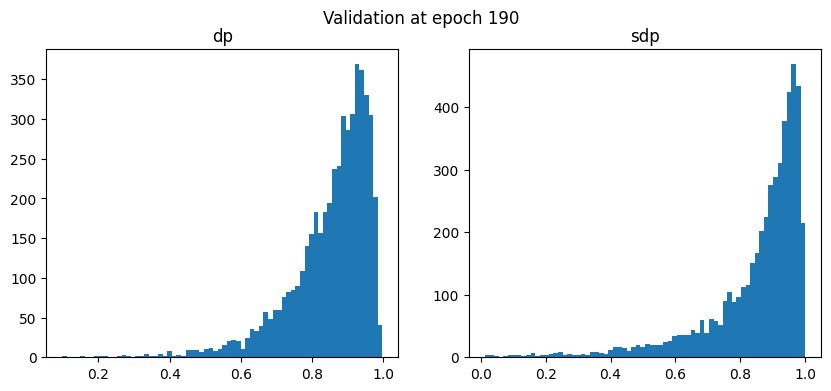

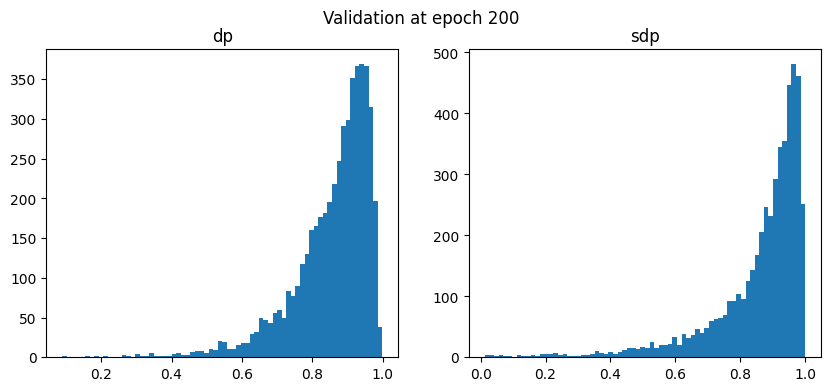

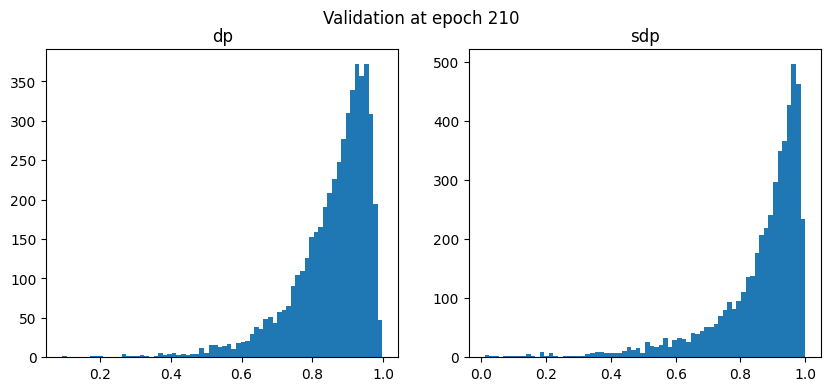

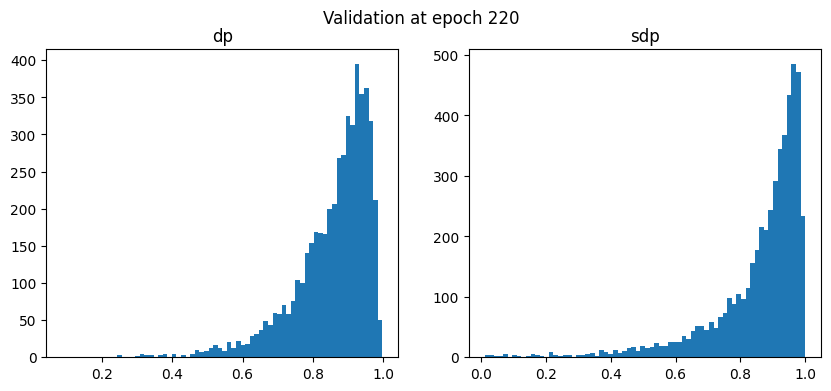

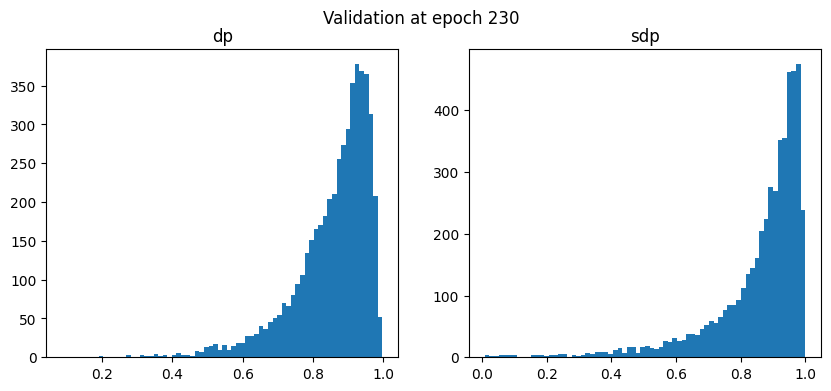

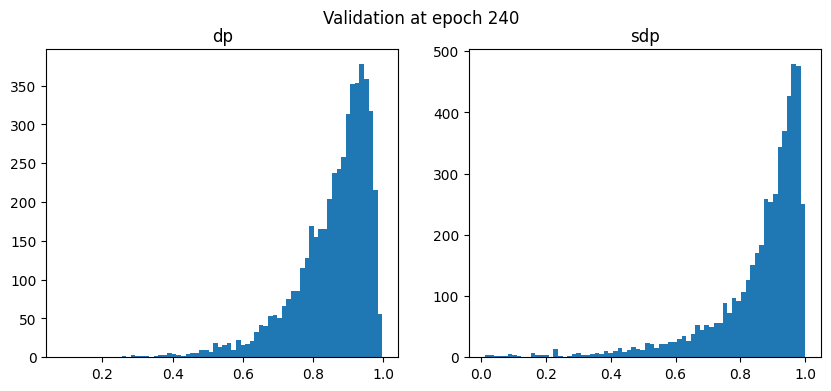

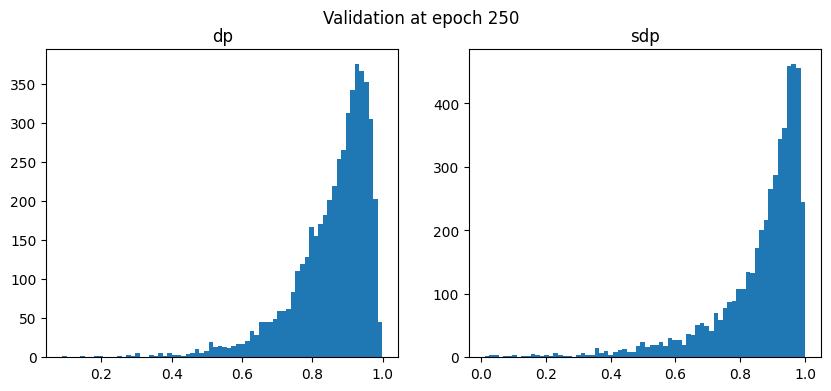

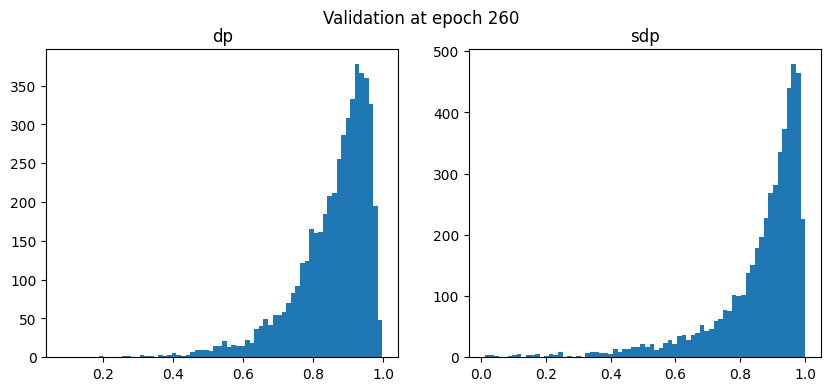

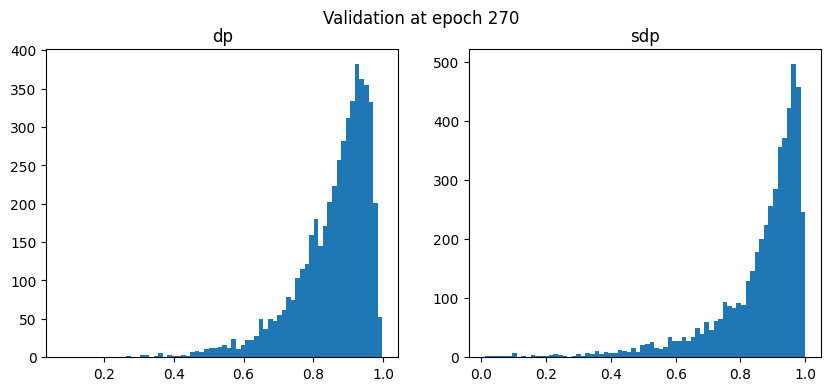

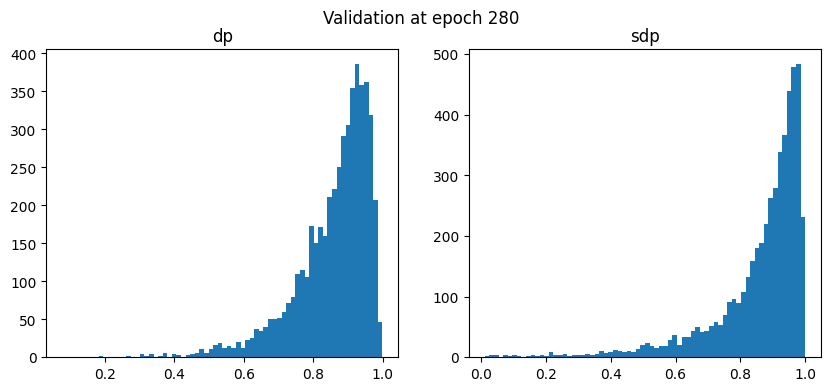

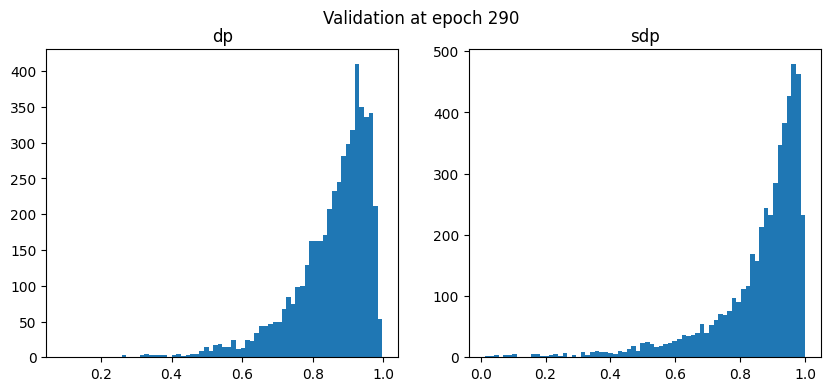

In [ ]:
validation_metrics.plot_histograms(statistics_validation)

In [ ]:
validation_metrics.print_mean_and_deviation(statistics_validation)

/content/drive/MyDrive/NIST_SMALL/GAT_DEEP_BIG_POW/validation0.pkl
 | DotProduct mean is: 0.7696593715862206 and standard deviation is 0.12944484445915008
 | SteinDotProduct mean is: 0.7606872167360303 and standard deviation is 0.19480466874476376

/content/drive/MyDrive/NIST_SMALL/GAT_DEEP_BIG_POW/validation10.pkl
 | DotProduct mean is: 0.8389506039452739 and standard deviation is 0.10936019383973745
 | SteinDotProduct mean is: 0.8395701736034391 and standard deviation is 0.14973827804470782

/content/drive/MyDrive/NIST_SMALL/GAT_DEEP_BIG_POW/validation20.pkl
 | DotProduct mean is: 0.8484850727753462 and standard deviation is 0.1075981213192642
 | SteinDotProduct mean is: 0.8502719437215066 and standard deviation is 0.14605327483710376

/content/drive/MyDrive/NIST_SMALL/GAT_DEEP_BIG_POW/validation30.pkl
 | DotProduct mean is: 0.8497058850614442 and standard deviation is 0.10898766849757657
 | SteinDotProduct mean is: 0.8508730279046235 and standard deviation is 0.14704227808101328

/c

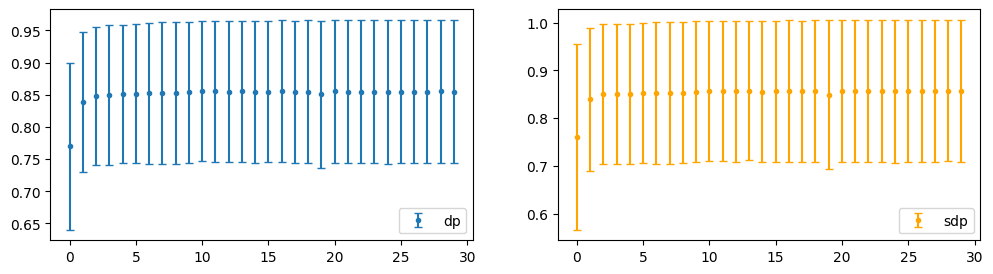

In [ ]:
validation_metrics.plot_progres_bar(statistics_validation)

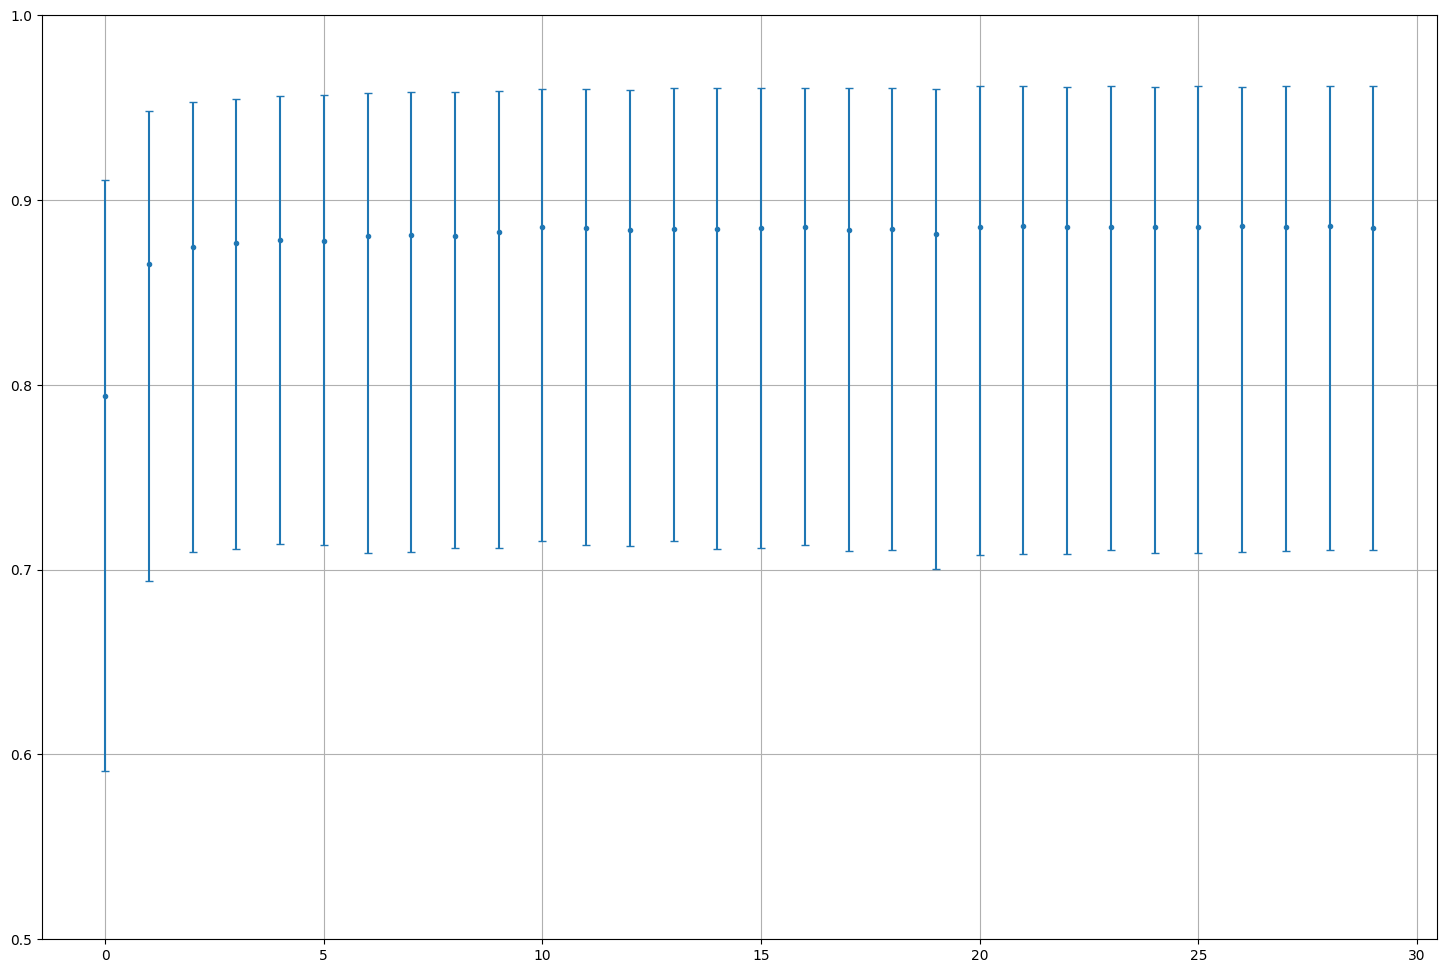

In [ ]:
validation_metrics.plot_median(statistics_validation)

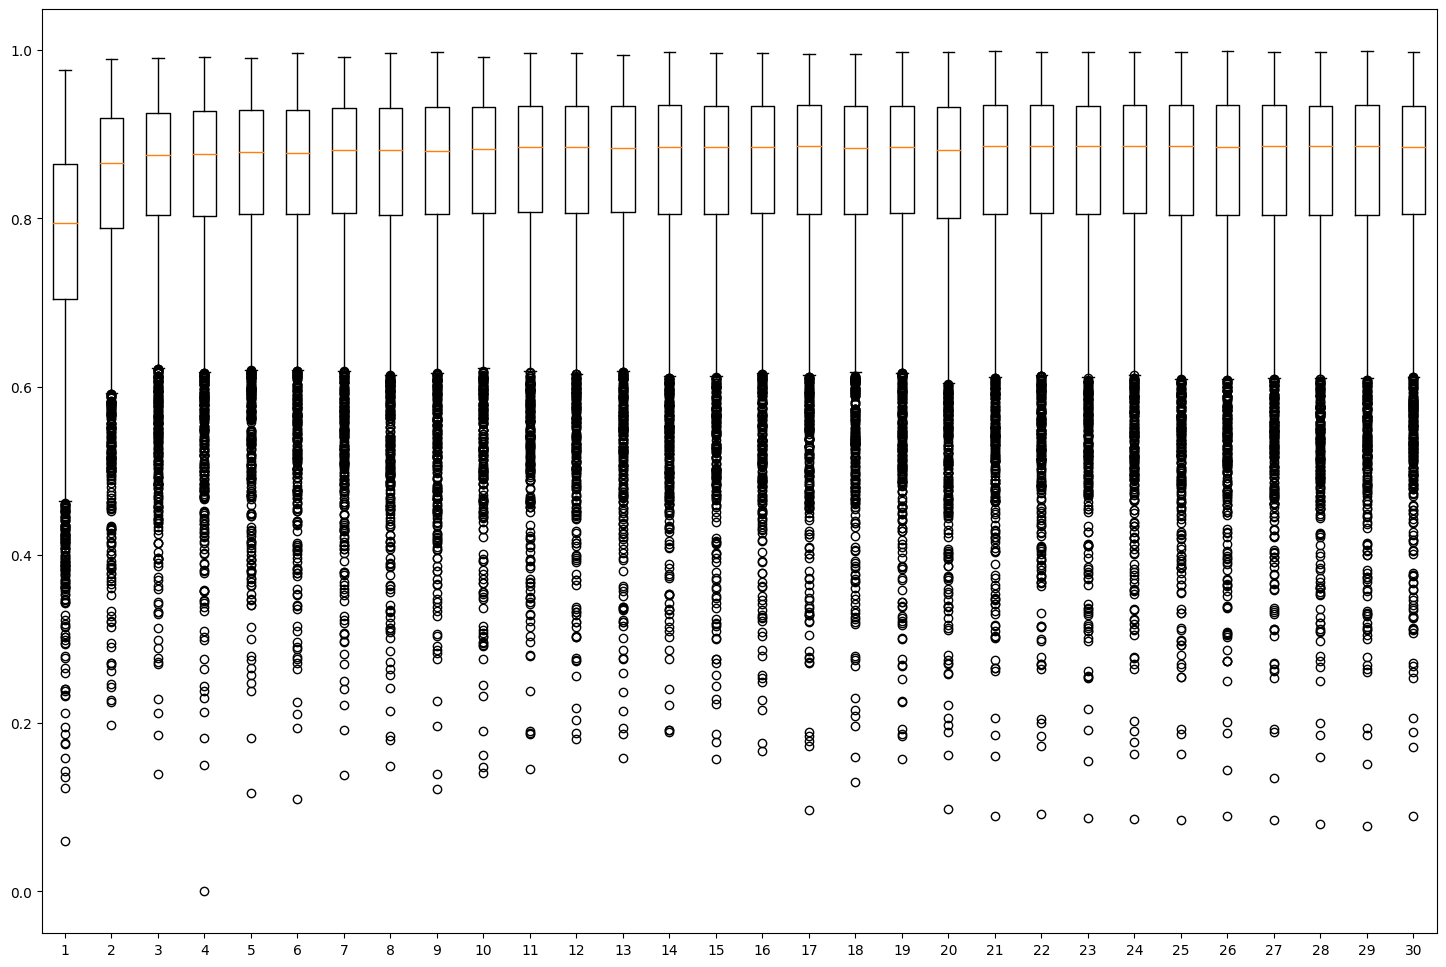

In [ ]:
validation_metrics.plot_boxplot_outliers(statistics_validation)

# FINAL TEST

In [ ]:
with open("/content/drive/MyDrive/NIST_SMALL/Preprocessed_test_pow_preparation_no_sparse_small.output", 'rb') as handle:
    data_list_test  = pickle.load(handle)

In [ ]:
heads = 4
model = model_base_big.GAT_DEEP_BIG(heads)
checkpoint = torch.load("/content/drive/MyDrive/NIST_SMALL/GAT_DEEP_BIG_POW/290.pt", map_location=torch.device('cpu'))
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()

GAT_DEEP_BIG(
  (initial_conv): GATConv(50, 300, heads=4)
  (skipgat1): SKIPGAT(
    (relu1): ReLU()
    (conv1): GATConv(1200, 300, heads=4)
    (relu2): ReLU()
    (conv2): GATConv(1200, 300, heads=4)
  )
  (skipgat2): SKIPGAT(
    (relu1): ReLU()
    (conv1): GATConv(1200, 300, heads=4)
    (relu2): ReLU()
    (conv2): GATConv(1200, 300, heads=4)
  )
  (skipgat3): SKIPGAT(
    (relu1): ReLU()
    (conv1): GATConv(1200, 300, heads=4)
    (relu2): ReLU()
    (conv2): GATConv(1200, 300, heads=4)
  )
  (skipgat4): SKIPGAT(
    (relu1): ReLU()
    (conv1): GATConv(1200, 300, heads=4)
    (relu2): ReLU()
    (conv2): GATConv(1200, 300, heads=4)
  )
  (mean_conv): GATConv(1200, 300, heads=4)
  (mean_relu): ReLU()
  (bottleneck): Linear(in_features=300, out_features=2000, bias=True)
  (skip1): SKIPblock(
    (batchNorm1): BatchNorm1d(2000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu1): ReLU()
    (dropout1): Dropout(p=0.2, inplace=False)
    (hidden1): Linear(i

In [ ]:
matchms.set_matchms_logger_level("ERROR")

test_loader_unshuffled = DataLoader(data_list_test, 
                         batch_size=BATCH, shuffle=False)

true_list, pred_list, dp, sdp = validation_metrics.validate_dataset(test_loader_unshuffled, model)

/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:22: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


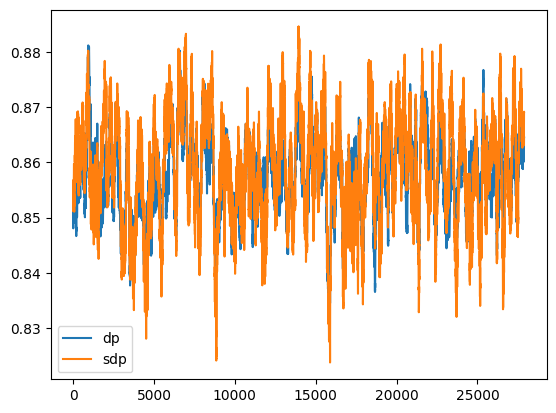

In [ ]:
win = 200
smooth_dp = np.convolve(dp, np.ones(win)/win, mode='valid')
smooth_sdp = np.convolve(sdp, np.ones(win)/win, mode='valid')

plt.plot(smooth_dp,label='dp')
plt.plot(smooth_sdp,label='sdp')
plt.legend()

plt.show()

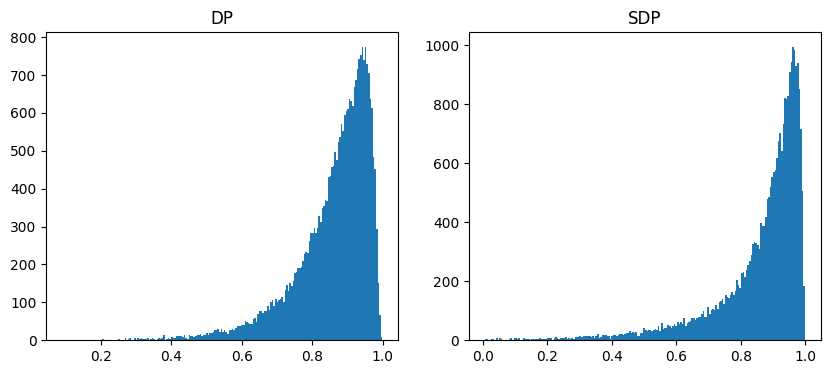

In [ ]:
bins = 200
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.hist(dp,label='DP',bins=bins)
plt.title('DP')
plt.subplot(122)
plt.hist(sdp,label='SDP',bins=bins)
plt.title('SDP')
plt.show()

In [ ]:
print(f" | DotProduct mean is: {np.mean(dp)} and standard deviation is {np.std(dp)}")

print(f" | SteinDotProduct mean is: {np.mean(sdp)} and standard deviation is {np.std(sdp)}")

 | DotProduct mean is: 0.8575170320329247 and standard deviation is 0.11005000577081722
 | SteinDotProduct mean is: 0.8588066776367217 and standard deviation is 0.14673797423167106


In [ ]:
test_loader_unshuffled = DataLoader(data_list_test, 
                         batch_size=1, shuffle=False)

/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:22: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [ ]:
validation_metrics.measure_time(test_loader_unshuffled, model)

28082
[0.10904192924499512, 0.09345054626464844, 0.07191181182861328, 0.05198097229003906, 0.05029582977294922, 0.04728364944458008, 0.046478986740112305, 0.04465746879577637, 0.04692339897155762, 0.04500746726989746, 0.046701669692993164, 0.04603242874145508, 0.04334759712219238, 0.05042624473571777, 0.04492974281311035, 0.05295991897583008, 0.04819083213806152, 0.04388761520385742, 0.0458986759185791, 0.0423736572265625, 0.03975415229797363, 0.04499173164367676, 0.04121065139770508, 0.04505157470703125, 0.04477214813232422, 0.04395604133605957, 0.046898841857910156, 0.05367445945739746, 0.06518340110778809, 0.04771161079406738, 0.05088019371032715, 0.06618762016296387, 0.05467534065246582, 0.060623884201049805, 0.050522804260253906, 0.04977893829345703, 0.04766488075256348, 0.04809093475341797, 0.0478060245513916, 0.04816722869873047, 0.048540353775024414, 0.053642988204956055, 0.0482943058013916, 0.05079197883605957, 0.05189776420593262, 0.06511688232421875, 0.054253339767456055, 0.